In [1]:
import pandas as pd
df = pd.read_csv("/content/DATA DBD.csv")
df.head(2)

,No,Usia,Jenis Kelamin,Gejalah,Durasi Gejalah,Riwayat Kesehatan,Pemeriksaan Fisik,Pemeriksaan Laboratorium,Genetik,Faktor Resiko Lainnya,Data Komorbidatas,Kronologi Gejalah
0,1,25,Perempuan,"Demam, nyeri sendi, mual, ruam",5 hari,Tidak ada,Tidak ada temuan yang signifikan,"Trombosit: 150, Hematokrit: 40%, Uji NS1: Posi...",Tidak,lingkungan Perkotaan,Tidak ada,Demam dan nyeri sendi muncul secara bersamaan
1,2,40,Laki-laki,"Demam, nyeri otot, muntah, perdarahan",7 hari,Diabetes,Nyeri otot pada punggung bawah,"Trombosit: 120, Hematokrit: 38%, Uji NS1: Posi...",Tidak,"Perokok, lingkungan kotor",Hipertensi,Mual dan nyeri otot muncul setelah beberapa ha...


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
from google.colab import files
files.upload()

Saving DATA DBD.csv to DATA DBD (1).csv


{'DATA DBD (1).csv': b'No ,Usia,Jenis Kelamin,Gejalah,Durasi Gejalah,Riwayat Kesehatan,Pemeriksaan Fisik,Pemeriksaan Laboratorium,Genetik,Faktor Resiko Lainnya,Data Komorbidatas,Kronologi Gejalah\r\n1,25,Perempuan,"Demam, nyeri sendi, mual, ruam  ",5 hari  ,Tidak ada,Tidak ada temuan yang signifikan,"Trombosit: 150, Hematokrit: 40%, Uji NS1: Positif        ",Tidak,lingkungan Perkotaan,Tidak ada,Demam dan nyeri sendi muncul secara bersamaan\r\n2,40,Laki-laki,"Demam, nyeri otot, muntah, perdarahan ",7 hari,Diabetes,Nyeri otot pada punggung bawah,"Trombosit: 120, Hematokrit: 38%, Uji NS1: Positif  ",Tidak,"Perokok, lingkungan kotor",Hipertensi,Mual dan nyeri otot muncul setelah beberapa hari demam\r\n3,20,Perempuan,"Demam, sakit kepala, mual, ruam      ",4 hari,Tidak ada,Ruam merah di daerah lengan dan perut,"Trombosit: 180, Hematokrit: 42%, Uji NS1: Positif ",Tidak,Lingkungan kotor,Tidak ada,"Sakit kepala terjadi sejak awal, diikuti oleh demam"\r\n4,30,Perempuan,"Demam, nyeri sendi, saki

In [9]:
data = pd.read_csv('/content/DATA DBD (1).csv')
data.head()

,No,Usia,Jenis Kelamin,Gejalah,Durasi Gejalah,Riwayat Kesehatan,Pemeriksaan Fisik,Pemeriksaan Laboratorium,Genetik,Faktor Resiko Lainnya,Data Komorbidatas,Kronologi Gejalah
0,1,25,Perempuan,"Demam, nyeri sendi, mual, ruam",5 hari,Tidak ada,Tidak ada temuan yang signifikan,"Trombosit: 150, Hematokrit: 40%, Uji NS1: Posi...",Tidak,lingkungan Perkotaan,Tidak ada,Demam dan nyeri sendi muncul secara bersamaan
1,2,40,Laki-laki,"Demam, nyeri otot, muntah, perdarahan",7 hari,Diabetes,Nyeri otot pada punggung bawah,"Trombosit: 120, Hematokrit: 38%, Uji NS1: Posi...",Tidak,"Perokok, lingkungan kotor",Hipertensi,Mual dan nyeri otot muncul setelah beberapa ha...
2,3,20,Perempuan,"Demam, sakit kepala, mual, ruam",4 hari,Tidak ada,Ruam merah di daerah lengan dan perut,"Trombosit: 180, Hematokrit: 42%, Uji NS1: Posi...",Tidak,Lingkungan kotor,Tidak ada,"Sakit kepala terjadi sejak awal, diikuti oleh ..."
3,4,30,Perempuan,"Demam, nyeri sendi, sakit kepala",3 hari,Tidak ada,Nyeri pada daerah perut bawah,"Trombosit: 140, Hematokrit: 39%, Uji NS1: Nega...",Tidak,Pengguna Alkohol,Tidak ada,Demam dan nyeri sendi muncul secara bersamaan
4,5,25,Perempuan,"Demam, nyeri sendi, mual",5 hari,Tidak ada,Tidak ada temuan yang signifikan,"Trombosit: 150, Hematokrit: 40%, Uji NS1: Posi...",Tidak,lingkungan Perkotaan,Tidak ada,Demam dan nyeri sendi muncul secara bersamaan


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   No                        42 non-null     int64 
 1   Usia                      42 non-null     int64 
 2   Jenis Kelamin             42 non-null     object
 3   Gejalah                   42 non-null     object
 4   Durasi Gejalah            42 non-null     object
 5   Riwayat Kesehatan         42 non-null     object
 6   Pemeriksaan Fisik         42 non-null     object
 7   Pemeriksaan Laboratorium  42 non-null     object
 8   Genetik                   42 non-null     object
 9   Faktor Resiko Lainnya     42 non-null     object
 10  Data Komorbidatas         42 non-null     object
 11  Kronologi Gejalah         42 non-null     object
dtypes: int64(2), object(10)
memory usage: 4.1+ KB


In [15]:
data_x=data.iloc[:,[1,4]]
data_x.head()

,Usia,Durasi Gejalah
0,25,5 hari
1,40,7 hari
2,20,4 hari
3,30,3 hari
4,25,5 hari


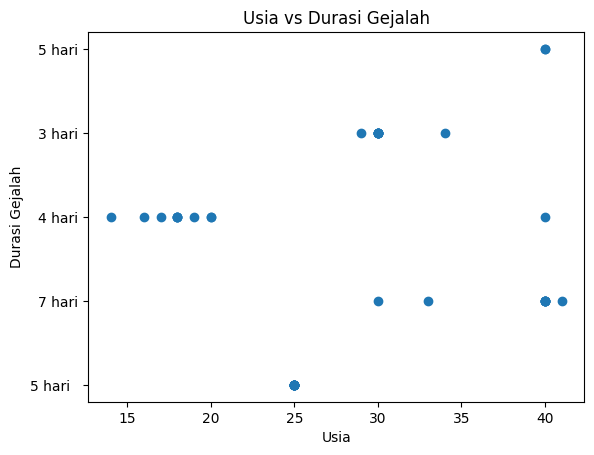

In [27]:
plt.scatter(data['Usia'], data['Durasi Gejalah'])
plt.title('Usia vs Durasi Gejalah')
plt.xlabel('Usia')
plt.ylabel('Durasi Gejalah')
plt.show()


In [28]:
x_array = np.array(data_x)
print(x_array)

[[25 '5 hari  ']
 [40 '7 hari']
 [20 '4 hari']
 [30 '3 hari']
 [25 '5 hari  ']
 [40 '5 hari']
 [17 '4 hari']
 [34 '3 hari']
 [25 '5 hari  ']
 [40 '4 hari']
 [20 '4 hari']
 [30 '3 hari']
 [25 '5 hari  ']
 [33 '7 hari']
 [14 '4 hari']
 [30 '7 hari']
 [25 '5 hari  ']
 [41 '7 hari']
 [18 '4 hari']
 [30 '3 hari']
 [25 '5 hari  ']
 [40 '7 hari']
 [18 '4 hari']
 [30 '3 hari']
 [25 '5 hari  ']
 [40 '5 hari']
 [18 '4 hari']
 [30 '3 hari']
 [25 '5 hari  ']
 [40 '7 hari']
 [19 '4 hari']
 [30 '3 hari']
 [25 '5 hari  ']
 [40 '7 hari']
 [16 '4 hari']
 [29 '3 hari']
 [25 '5 hari  ']
 [40 '7 hari']
 [18 '4 hari']
 [30 '3 hari']
 [25 '5 hari  ']
 [40 '7 hari']]


In [30]:
# Mengubah string menjadi nilai numerik
data['Durasi Gejalah'] = data['Durasi Gejalah'].str.replace(' hari', '').astype(int)




In [34]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data[['Usia', 'Durasi Gejalah']])

x_scaled

array([[0.40740741, 0.5       ],
       [0.96296296, 1.        ],
       [0.22222222, 0.25      ],
       [0.59259259, 0.        ],
       [0.40740741, 0.5       ],
       [0.96296296, 0.5       ],
       [0.11111111, 0.25      ],
       [0.74074074, 0.        ],
       [0.40740741, 0.5       ],
       [0.96296296, 0.25      ],
       [0.22222222, 0.25      ],
       [0.59259259, 0.        ],
       [0.40740741, 0.5       ],
       [0.7037037 , 1.        ],
       [0.        , 0.25      ],
       [0.59259259, 1.        ],
       [0.40740741, 0.5       ],
       [1.        , 1.        ],
       [0.14814815, 0.25      ],
       [0.59259259, 0.        ],
       [0.40740741, 0.5       ],
       [0.96296296, 1.        ],
       [0.14814815, 0.25      ],
       [0.59259259, 0.        ],
       [0.40740741, 0.5       ],
       [0.96296296, 0.5       ],
       [0.14814815, 0.25      ],
       [0.59259259, 0.        ],
       [0.40740741, 0.5       ],
       [0.96296296, 1.        ],
       [0.

In [35]:
#menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters =8,random_state=40)
#menentukan kluster dari data
kmeans.fit(x_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=40)

In [36]:
print(kmeans.cluster_centers_)

[[4.07407407e-01 5.00000000e-01]
 [9.68253968e-01 1.00000000e+00]
 [6.04938272e-01 1.66533454e-16]
 [1.66666667e-01 2.50000000e-01]
 [9.62962963e-01 5.00000000e-01]
 [6.48148148e-01 1.00000000e+00]
 [9.62962963e-01 2.50000000e-01]
 [3.70370370e-02 2.50000000e-01]]


In [37]:
#menampilkan hasil kluster
print(kmeans.labels_)
#menambahkan kolom "kluster" dalam data frame driver
data["kluster"] = kmeans.labels_

[0 1 3 2 0 4 3 2 0 6 3 2 0 5 7 5 0 1 3 2 0 1 3 2 0 4 3 2 0 1 3 2 0 1 7 2 0
 1 3 2 0 1]


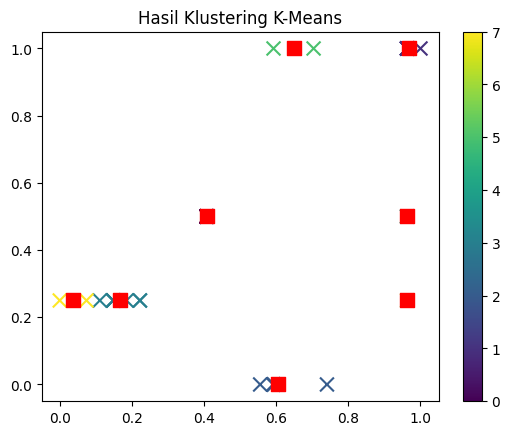

In [39]:
#menvisualisasikan hasil kluster, agar hasilnya tampak lebih jelas
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s=100,c=data.kluster,marker = "x", alpha=1,)
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=100, alpha=1, marker='s');
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()